In [1]:
import tensorflow as tf

In [2]:
import os


In [3]:
os.getcwd()

'/content'

In [4]:
%cd /content/drive/MyDrive/Yolo Model

/content/drive/MyDrive/Yolo Model


In [5]:
!wget https://pjreddie.com/media/files/yolov3.weights -O weights/yolov3.weights

--2022-07-25 16:45:05--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘weights/yolov3.weights’

weights/yolov3.weig 100%[===================>] 236.52M  51.0MB/s    in 4.6s    

2022-07-25 16:45:10 (51.0 MB/s) - ‘weights/yolov3.weights’ saved [248007048/248007048]



In [6]:
!python convert.py --weights weights/yolov3.weights --output weights/yolov3.tf

2022-07-25 16:53:39.071401: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "yolov3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 yolo_darknet (Functional)      ((None, None, None,  40620640    ['input_1[0][0]']                
                                 256),                                                            
                                 (None, None, None,                      

In [7]:
import time
from absl import app, flags, logging
from absl.flags import FLAGS
import cv2
import numpy as np
import tensorflow as tf
from models import YoloV3
from utils import draw_outputs, transform_images
import matplotlib.pyplot as plt

CLASSES_PATH = './coco.names'
WEIGHTS_PATH = './weights/yolov3.tf'
IMAGE_SIZE = 416

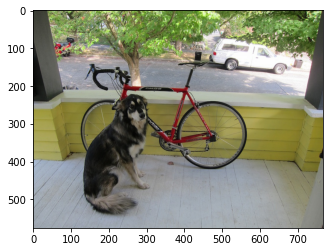

In [8]:
yolo = YoloV3()
yolo.load_weights(WEIGHTS_PATH)
class_names = [c.strip() for c in open(CLASSES_PATH).readlines()]

img = tf.image.decode_image(open('./dog_example.jpg', 'rb').read(), channels=3)
plt.imshow(img)
plt.show()

input_img = tf.expand_dims(img, 0)
input_img = transform_images(input_img, IMAGE_SIZE)

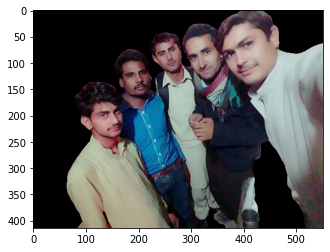

	person, 0.9980194568634033, [0.6398259 0.        1.        0.999959 ]
	person, 0.996119499206543, [0.3541843 0.1022189 0.6394334 1.       ]
	person, 0.9795482754707336, [0.12528531 0.28632507 0.5281632  1.        ]
	person, 0.9170695543289185, [0.52217937 0.05358729 0.7962427  0.9659171 ]


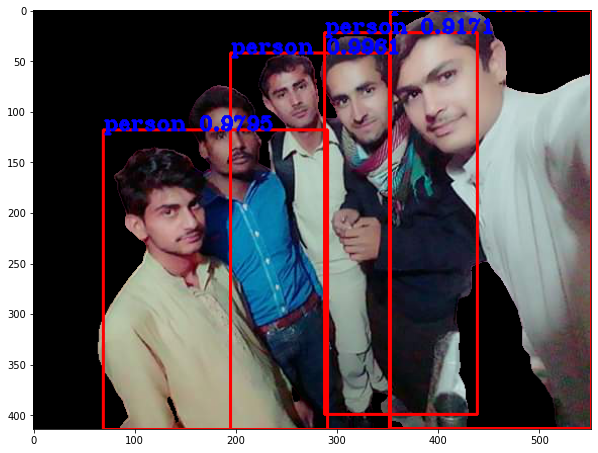

In [10]:
img = tf.image.decode_image(open('./abc.png', 'rb').read(), channels=3)
plt.imshow(img)
plt.show()

input_img = tf.expand_dims(img, 0)
input_img = transform_images(input_img, IMAGE_SIZE)

boxes, scores, classes, nums = yolo(input_img)


logging.info('detections:')
for i in range(nums[0]):
    print('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                       np.array(scores[0][i]),
                                       np.array(boxes[0][i])))

prediction_img = draw_outputs(img.numpy(), (boxes, scores, classes, nums), class_names)
plt.figure(figsize=(10, 20))
plt.imshow(prediction_img)

	person, 0.9980194568634033, [0.6398259 0.        1.        0.999959 ]
	person, 0.996119499206543, [0.3541843 0.1022189 0.6394334 1.       ]
	person, 0.9795482754707336, [0.12528531 0.28632507 0.5281632  1.        ]
	person, 0.9170695543289185, [0.52217937 0.05358729 0.7962427  0.9659171 ]


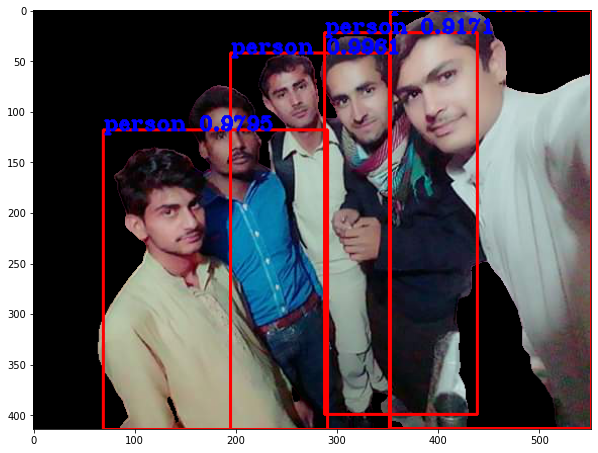

In [11]:
boxes, scores, classes, nums = yolo(input_img)


logging.info('detections:')
for i in range(nums[0]):
    print('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                       np.array(scores[0][i]),
                                       np.array(boxes[0][i])))

prediction_img = draw_outputs(img.numpy(), (boxes, scores, classes, nums), class_names)
plt.figure(figsize=(10, 20))
plt.imshow(prediction_img)